In [98]:
import pandas as pd
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [99]:
ILUMINA_CLEAN_PATH = Path('../data/Ilumina/clean')
RESULTS = Path('../data/results')

In [100]:
IluminaPylumCodOH = pd.read_csv(ILUMINA_CLEAN_PATH / "IluminaPylumCodOH.csv", index_col=0)
IluminaPylumCodOH = IluminaPylumCodOH[IluminaPylumCodOH["Fertil"] == 0]
IluminaPylumCodOH = IluminaPylumCodOH.drop(columns=["Fertil"])

In [101]:
IluminaPylumCodOH.head()

,Firmicutes_1.0,Firmicutes_2.0,Firmicutes_4.0,Firmicutes_5.0,Firmicutes_6.0,Firmicutes_7.0,Firmicutes_8.0,Firmicutes_9.0,Firmicutes_10.0,Proteobacteria_1.0,...,Balneolaeota_10.0,Fibrobacteres_10.0,Chlamydiae_10.0,Acidobacteria_7.0,Acidobacteria_8.0,Acidobacteria_10.0,Kiritimatiellaeota_10.0,Nitrospirae_10.0,candidate.division.Zixibacteria_10.0,Thermodesulfobacteria_10.0
Sample ID,,,,,,,,,,,,,,,,,,,,,
UAB 17001,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
UAB 17002,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
UAB 17003,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
UAB 17004,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
UAB 17005,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False


In [102]:
# print(sum(bool(x) for x in IluminaPylumCodOH[["Firmicutes__0.0"]]))

In [103]:
frequent_itemsets = apriori(IluminaPylumCodOH, min_support=0.3, use_colnames=True, low_memory=True)
frequent_itemsets_filtered = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) > 1)]

In [104]:
frequent_itemsets_filtered

,support,itemsets
16,0.333333,"(Armatimonadetes_9.0, Spirochaetes_7.0)"
17,0.476190,"(Planctomycetes_9.0, Armatimonadetes_9.0)"
18,0.428571,"(Armatimonadetes_9.0, Chloroflexi_10.0)"
19,0.547619,"(Armatimonadetes_9.0, Chrysiogenetes_10.0)"
20,0.357143,"(Armatimonadetes_9.0, Aquificae_10.0)"
...,...,...
135,0.333333,"(Chlorobi_10.0, Chrysiogenetes_10.0, Chlorofle..."
136,0.309524,"(Cyanobacteria_8.0, Chrysiogenetes_10.0, Chlor..."
137,0.309524,"(Chlorobi_10.0, Chloroflexi_10.0, Planctomycet..."
138,0.309524,"(Thermotogae_10.0, Chloroflexi_10.0, Planctomy..."


In [105]:
frequent_itemsets_filtered.to_csv(RESULTS / "frequent_itemsets.csv", index=False, encoding='utf-8')

In [106]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold = 1)

In [107]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Armatimonadetes_9.0),(Spirochaetes_7.0),0.619048,0.404762,0.333333,0.538462,1.330317,0.082766,1.289683,0.651786
1,(Spirochaetes_7.0),(Armatimonadetes_9.0),0.404762,0.619048,0.333333,0.823529,1.330317,0.082766,2.158730,0.417143
2,(Planctomycetes_9.0),(Armatimonadetes_9.0),0.642857,0.619048,0.476190,0.740741,1.196581,0.078231,1.469388,0.460000
3,(Armatimonadetes_9.0),(Planctomycetes_9.0),0.619048,0.642857,0.476190,0.769231,1.196581,0.078231,1.547619,0.431250
4,(Armatimonadetes_9.0),(Chloroflexi_10.0),0.619048,0.595238,0.428571,0.692308,1.163077,0.060091,1.315476,0.368056
...,...,...,...,...,...,...,...,...,...,...
863,(Chlorobi_10.0),"(Planctomycetes_9.0, Armatimonadetes_9.0, Chry...",0.500000,0.357143,0.309524,0.619048,1.733333,0.130952,1.687500,0.846154
864,(Thermotogae_10.0),"(Planctomycetes_9.0, Armatimonadetes_9.0, Chry...",0.595238,0.404762,0.309524,0.520000,1.284706,0.068594,1.240079,0.547511
865,(Planctomycetes_9.0),"(Thermotogae_10.0, Armatimonadetes_9.0, Chrysi...",0.642857,0.357143,0.309524,0.481481,1.348148,0.079932,1.239796,0.723077
866,(Armatimonadetes_9.0),"(Thermotogae_10.0, Planctomycetes_9.0, Chrysio...",0.619048,0.333333,0.309524,0.500000,1.500000,0.103175,1.333333,0.875000


In [108]:
rules.to_csv(RESULTS / "rules.csv", index=False, encoding='utf-8')

In [109]:
filtered_rules = rules[rules['consequents'].apply(lambda x: len(x) == 1)]
filtered_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: len(x) == 1)]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Armatimonadetes_9.0),(Spirochaetes_7.0),0.619048,0.404762,0.333333,0.538462,1.330317,0.082766,1.289683,0.651786
1,(Spirochaetes_7.0),(Armatimonadetes_9.0),0.404762,0.619048,0.333333,0.823529,1.330317,0.082766,2.158730,0.417143
2,(Planctomycetes_9.0),(Armatimonadetes_9.0),0.642857,0.619048,0.476190,0.740741,1.196581,0.078231,1.469388,0.460000
3,(Armatimonadetes_9.0),(Planctomycetes_9.0),0.619048,0.642857,0.476190,0.769231,1.196581,0.078231,1.547619,0.431250
4,(Armatimonadetes_9.0),(Chloroflexi_10.0),0.619048,0.595238,0.428571,0.692308,1.163077,0.060091,1.315476,0.368056
...,...,...,...,...,...,...,...,...,...,...
77,(Chlorobi_10.0),(Cyanobacteria_8.0),0.500000,0.571429,0.333333,0.666667,1.166667,0.047619,1.285714,0.285714
78,(Cyanobacteria_8.0),(Thermotogae_10.0),0.571429,0.595238,0.404762,0.708333,1.190000,0.064626,1.387755,0.372549
79,(Thermotogae_10.0),(Cyanobacteria_8.0),0.595238,0.571429,0.404762,0.680000,1.190000,0.064626,1.339286,0.394464
80,(Thermotogae_10.0),(Chlamydiae_10.0),0.595238,0.357143,0.309524,0.520000,1.456000,0.096939,1.339286,0.773756


In [110]:
filtered_rules['consequents'] = filtered_rules['consequents'].astype(str)
filtered_rules['antecedents'] = filtered_rules['antecedents'].astype(str)

In [111]:
heatmap_data = filtered_rules.pivot(index='antecedents', columns='consequents', values='confidence')

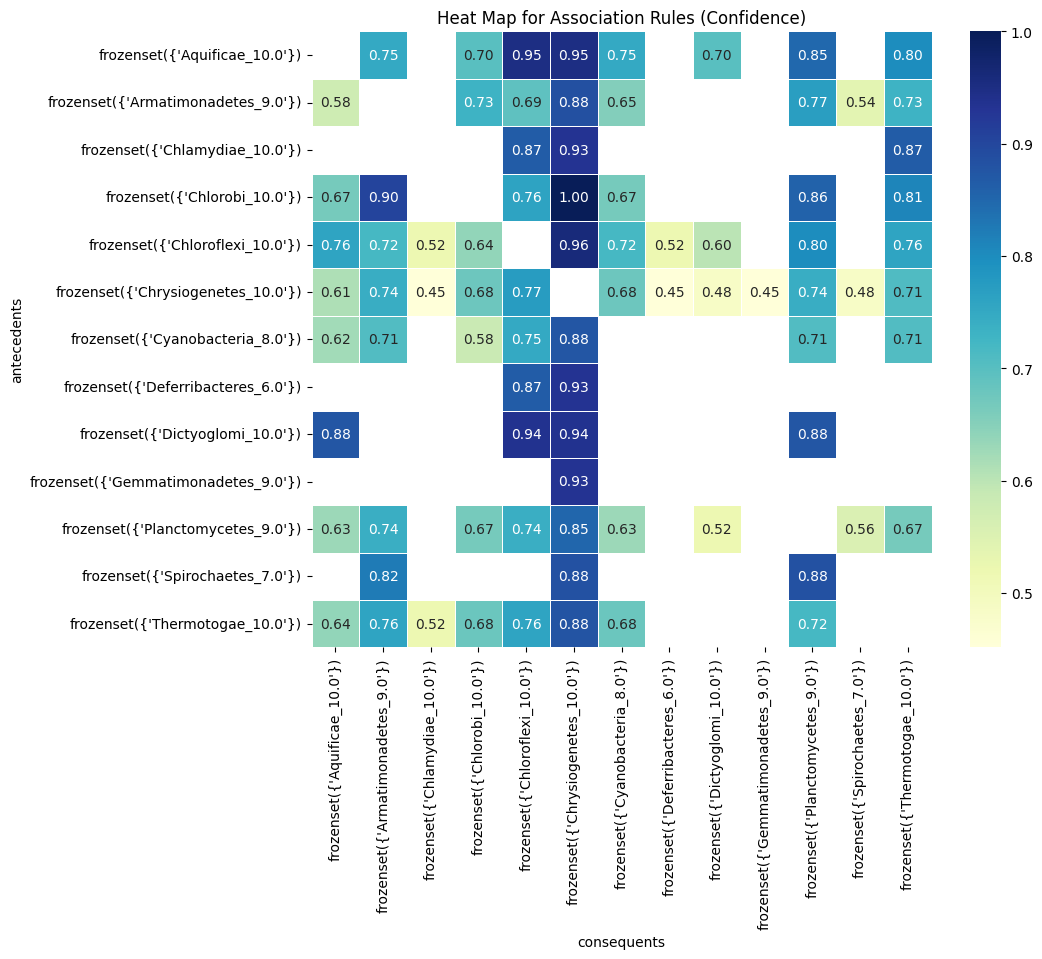

In [112]:
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Heat Map for Association Rules (Confidence)")
plt.show()